In [368]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [369]:
df = pd.read_csv('result.csv')

In [370]:
df.columns

Index(['paper', 'model', 'sentence', 'FRE', 'FOG', 'characters_per_word',
       'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph',
       'type_token_ratio', 'characters', 'syllables', 'words', 'wordtypes',
       'sentences', 'paragraphs', 'long_words', 'complex_words',
       'complex_words_dc', 'tobeverb', 'auxverb', 'conjunction', 'pronoun',
       'preposition', 'nominalization', 'interrogative', 'article',
       'subordination'],
      dtype='object')

In [371]:
df.model.value_counts()

SIMPLIFIED T3       947
SIMPLIFIED T1       936
SIMPLIFIED T2       888
ORIGINAL 0          646
SIMPLIFIED T4P2     267
SIMPLIFIED T4P1     216
SIMPLIFIED T4P3     131
SIMPLIFIED MTSL      94
SIMPLIFIED MTSL2     53
Name: model, dtype: int64

In [372]:
df.paper.value_counts()

Artikel 2 BN    1368
Artikel 3 PE    1288
Artikel 1 AI     833
Artikel 4 GE     689
Name: paper, dtype: int64

# Artikel 1

In [373]:
artikel_1 = df[(df['paper'] == 'Artikel 1 AI') & (df['FRE'] > 0)]

In [374]:
artikel_1.groupby('model').count()['sentence']

model
ORIGINAL 0          78
SIMPLIFIED MTSL     43
SIMPLIFIED T1      101
SIMPLIFIED T2       82
SIMPLIFIED T3      100
SIMPLIFIED T4P1     61
SIMPLIFIED T4P2     89
SIMPLIFIED T4P3     39
Name: sentence, dtype: int64

In [375]:
artikel_1.groupby('model')['words_per_sentence'].sum()

model
ORIGINAL 0         1635.0
SIMPLIFIED MTSL     924.5
SIMPLIFIED T1      2200.0
SIMPLIFIED T2      1782.0
SIMPLIFIED T3      2082.0
SIMPLIFIED T4P1    1309.0
SIMPLIFIED T4P2    1817.0
SIMPLIFIED T4P3     497.0
Name: words_per_sentence, dtype: float64

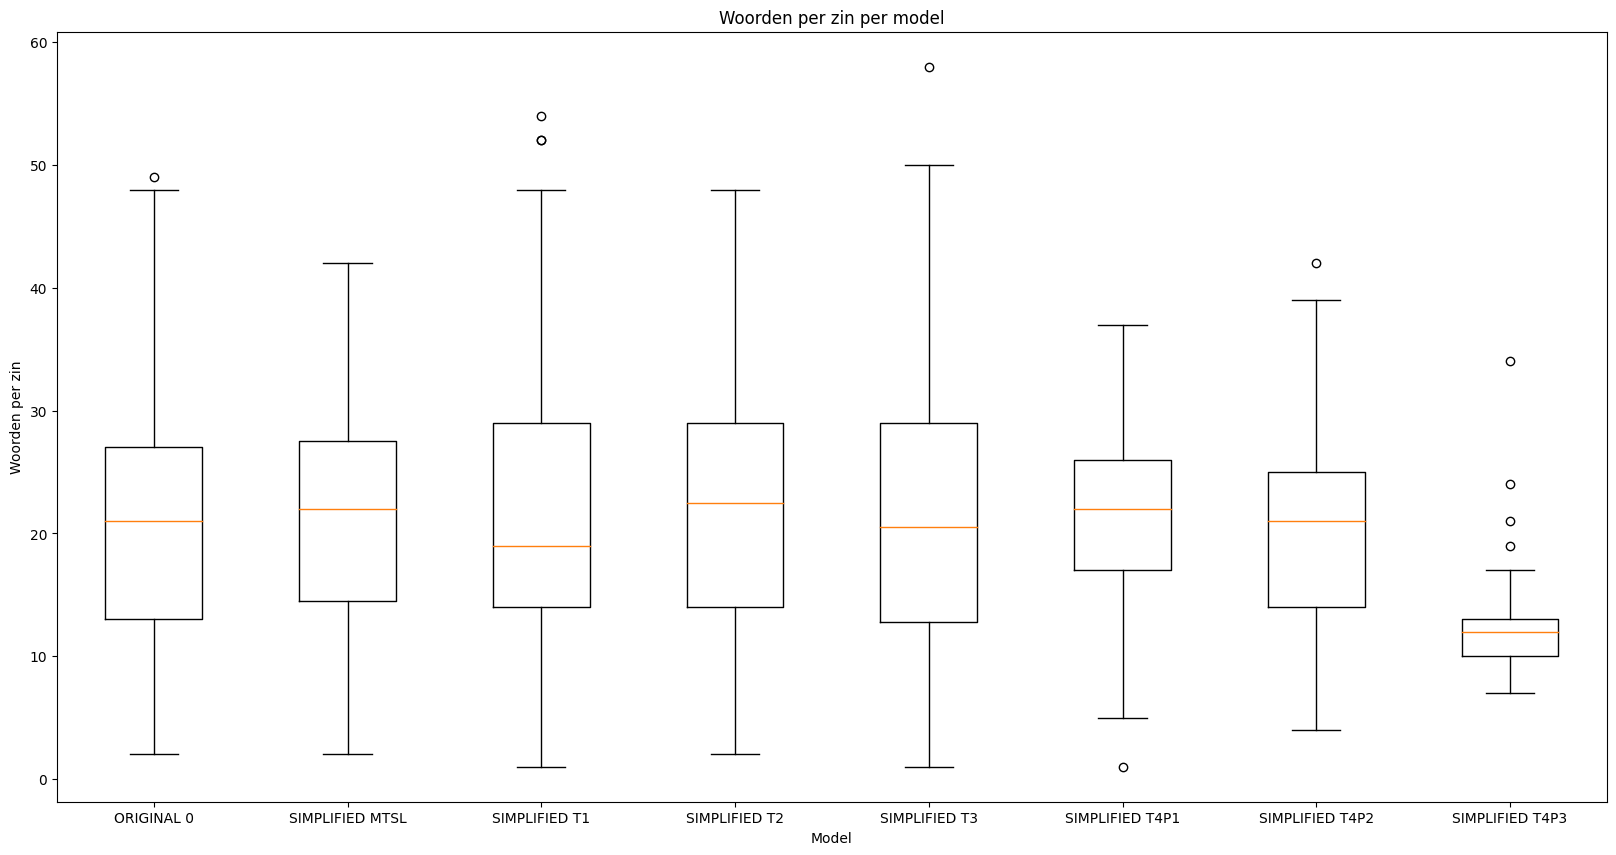

In [376]:
data = artikel_1.groupby('model')['words_per_sentence']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Woorden per zin')
plt.savefig('boxplot-avg-a1.png')

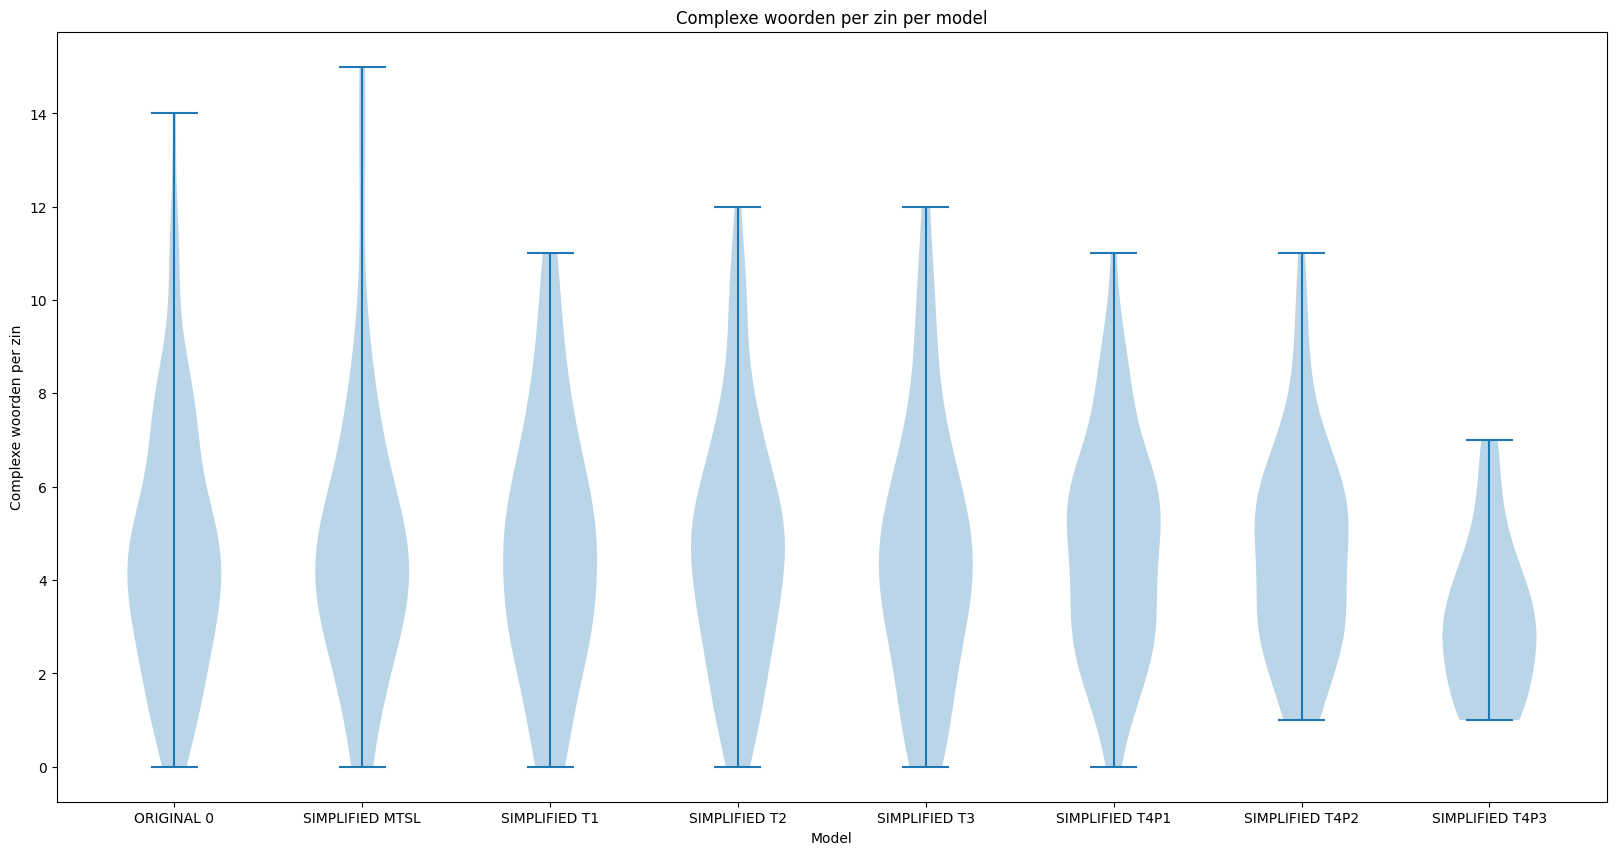

In [377]:
data = artikel_1.groupby('model')['complex_words']
data_list = [group[1].tolist() for group in data]

plt.figure(figsize=(20, 10))
plt.violinplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Complexe woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Complexe woorden per zin')
plt.savefig('violinplot-complex-a1.png')

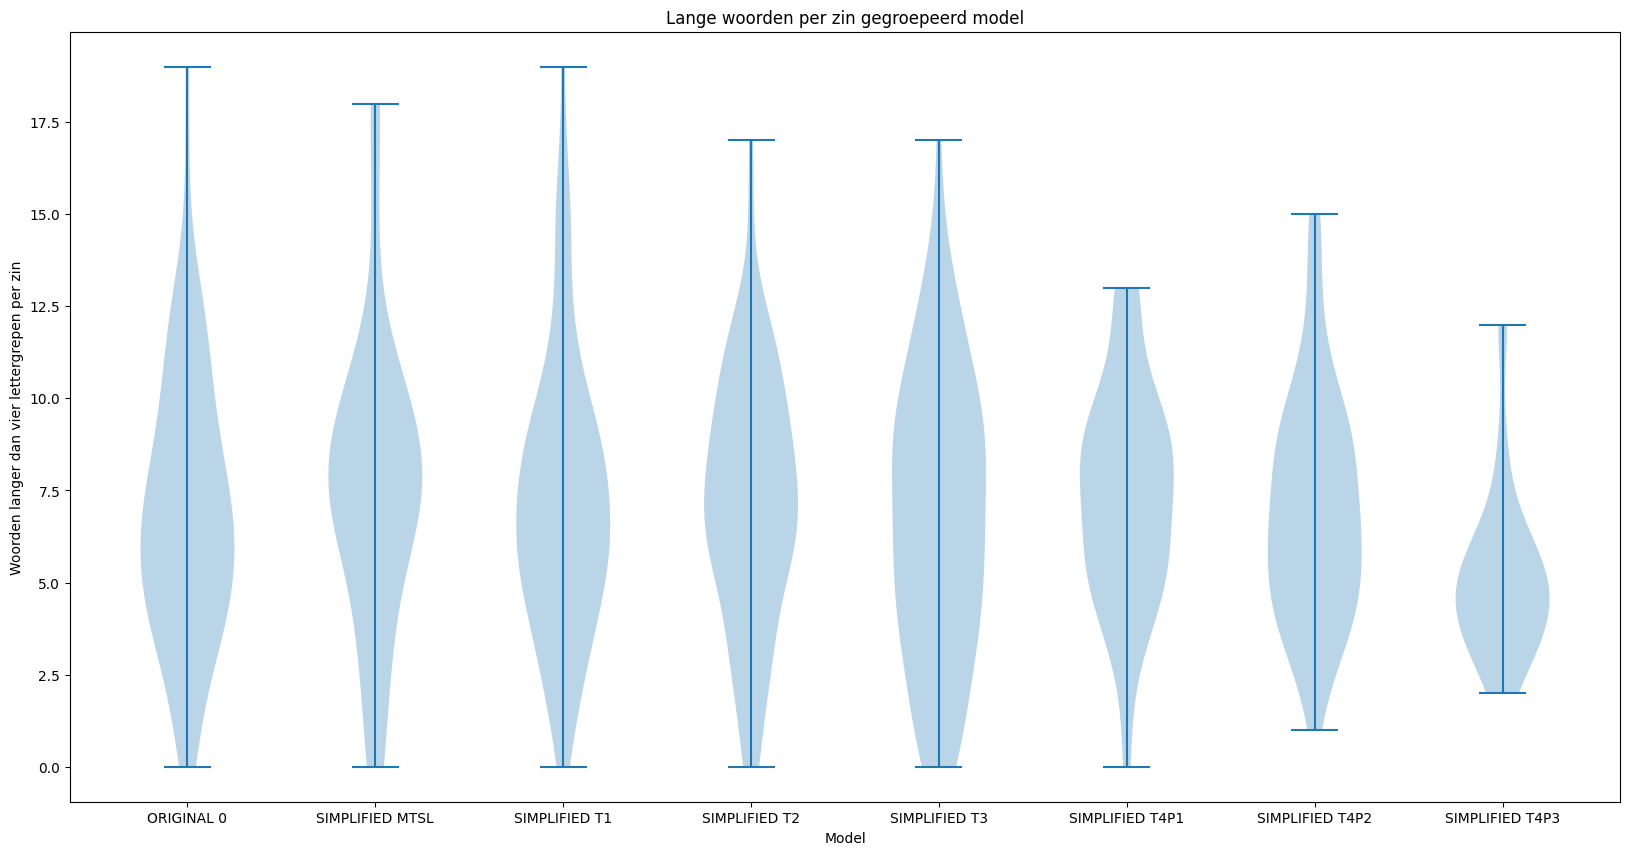

In [378]:
data = artikel_1.groupby('model')['long_words']
data_list = [group[1].tolist() for group in data]

plt.figure(figsize=(20, 10))
plt.violinplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Lange woorden per zin gegroepeerd model')
plt.xlabel('Model')
plt.ylabel('Woorden langer dan vier lettergrepen per zin')
plt.savefig('violinplot-long-a1.png')

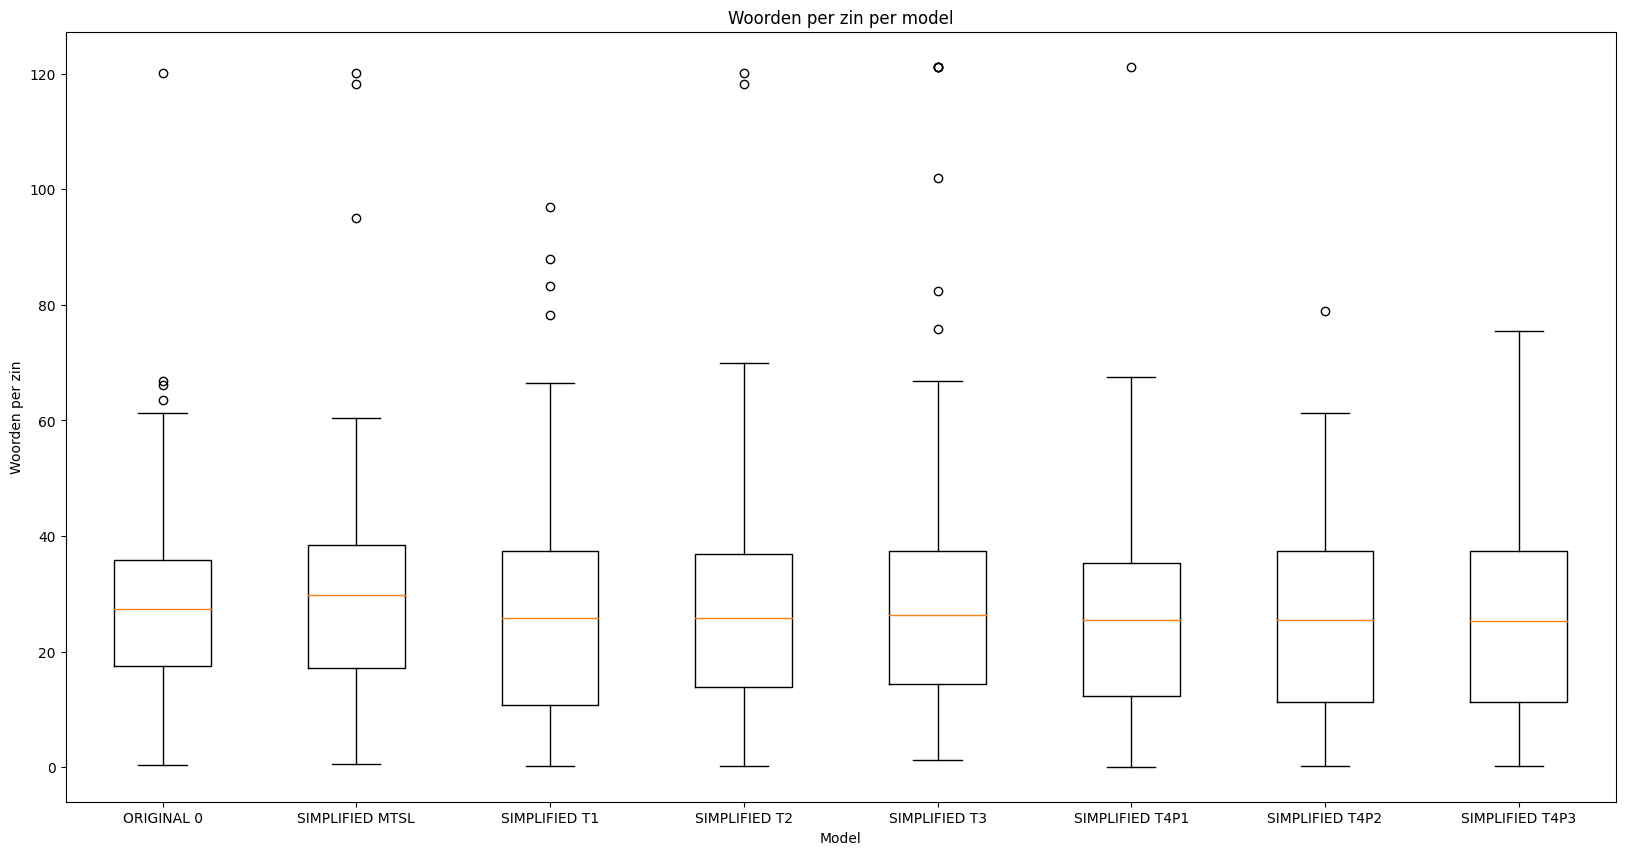

In [379]:
data = artikel_1.groupby('model')['FRE']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Woorden per zin')
plt.savefig('boxplot-fre-a1.png')

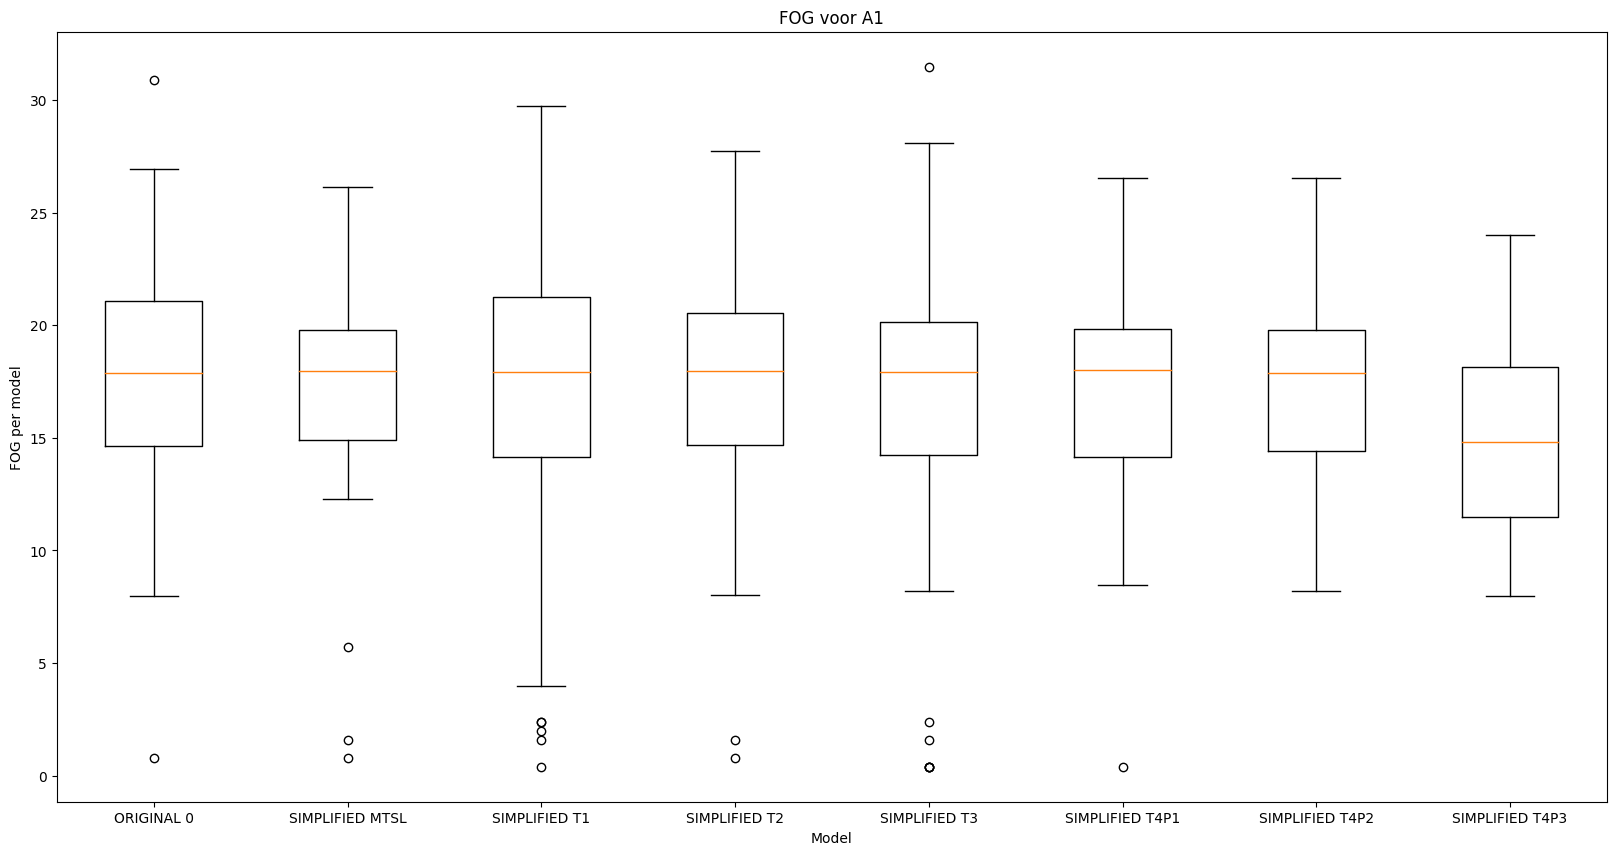

In [380]:
data = artikel_1.groupby('model')['FOG']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('FOG voor A1')
plt.xlabel('Model')
plt.ylabel('FOG per model')
plt.savefig('boxplot-fog-a1.png')

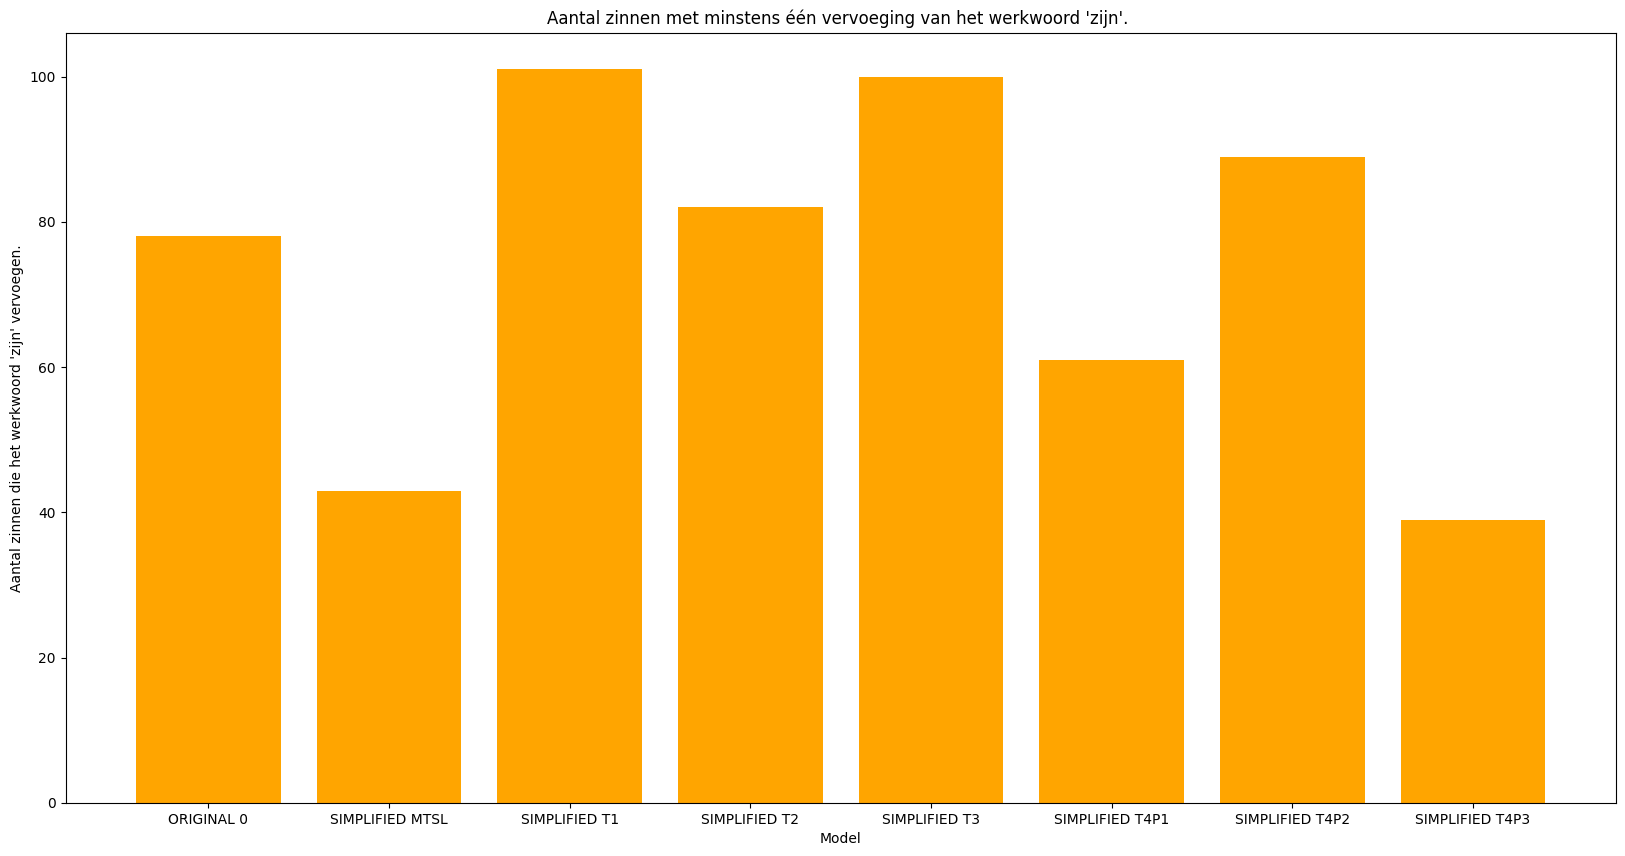

In [381]:
data = artikel_1.groupby('model')['tobeverb'].count()
plt.figure(figsize=(20, 10))
color = 'orange'
plt.bar(data.index, data.values, color=color)
plt.xlabel('Model')
plt.ylabel("Aantal zinnen die het werkwoord 'zijn' vervoegen.")
plt.title("Aantal zinnen met minstens één vervoeging van het werkwoord 'zijn'. ")
plt.savefig('boxplot-tobe-a1.png')

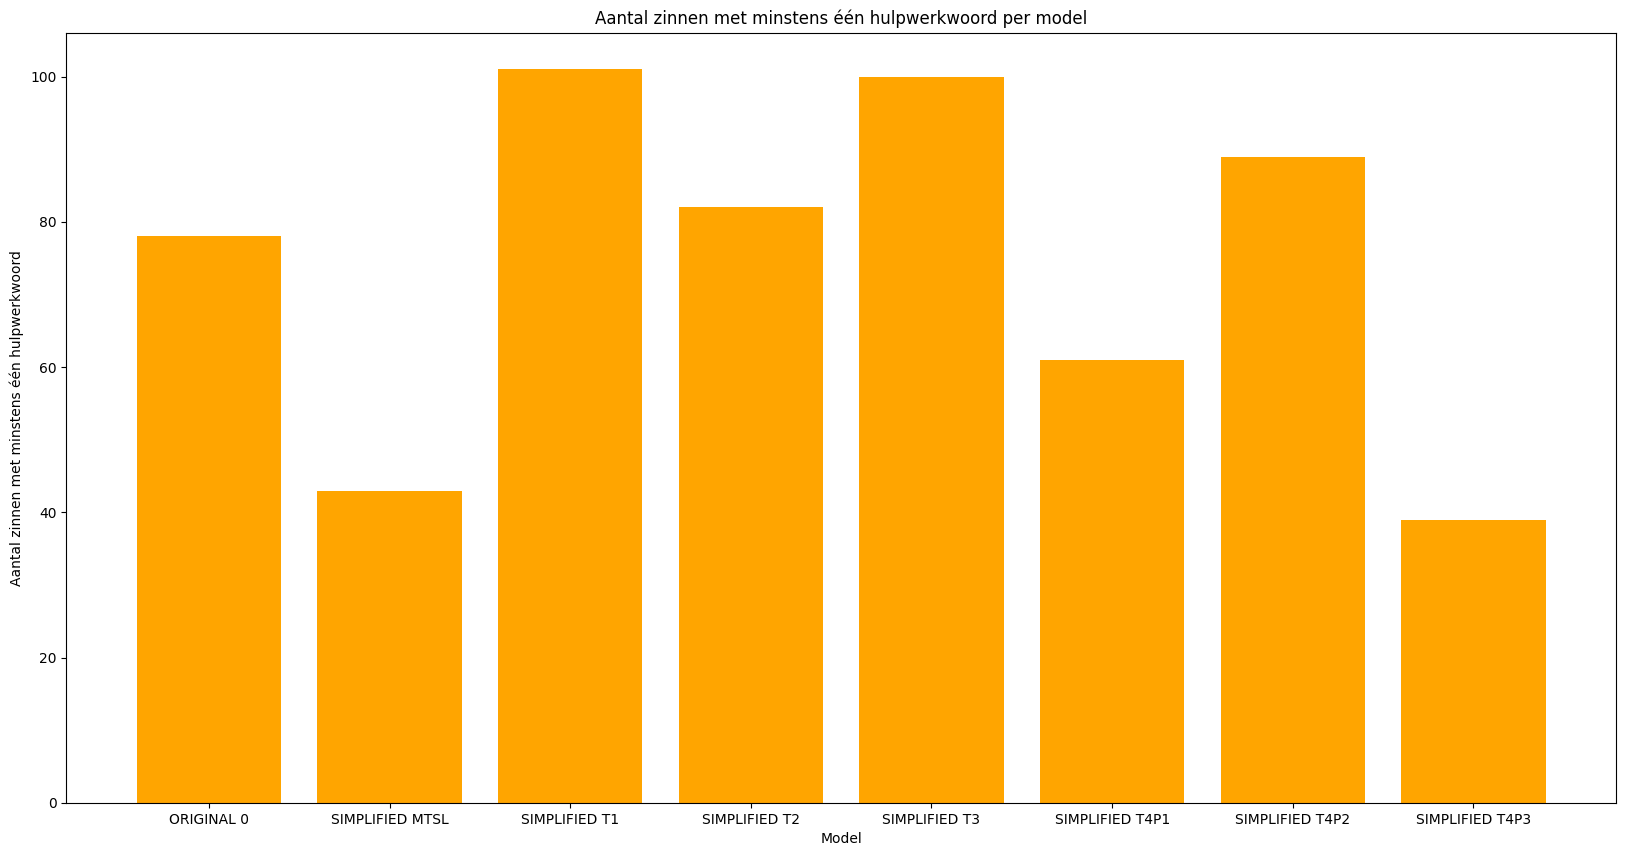

In [382]:
data = artikel_1.groupby('model')['auxverb'].count()
plt.figure(figsize=(20, 10))
color = 'orange'
plt.bar(data.index, data.values, color=color)
plt.xlabel('Model')
plt.ylabel('Aantal zinnen met minstens één hulpwerkwoord')
plt.title('Aantal zinnen met minstens één hulpwerkwoord per model')
plt.savefig('boxplot-aux-a1.png')

# Artikel 2

In [383]:
artikel_2 = df[(df['paper'] == 'Artikel 2 BN') & (df['FRE'] > 0)]

In [384]:
artikel_2.groupby('model').count()['sentence']

model
ORIGINAL 0          159
SIMPLIFIED MTSL      43
SIMPLIFIED MTSL2     50
SIMPLIFIED T1       209
SIMPLIFIED T2       209
SIMPLIFIED T3       209
SIMPLIFIED T4P1      98
SIMPLIFIED T4P2     133
SIMPLIFIED T4P3      55
Name: sentence, dtype: int64

In [385]:
artikel_2.groupby('model')['words_per_sentence']

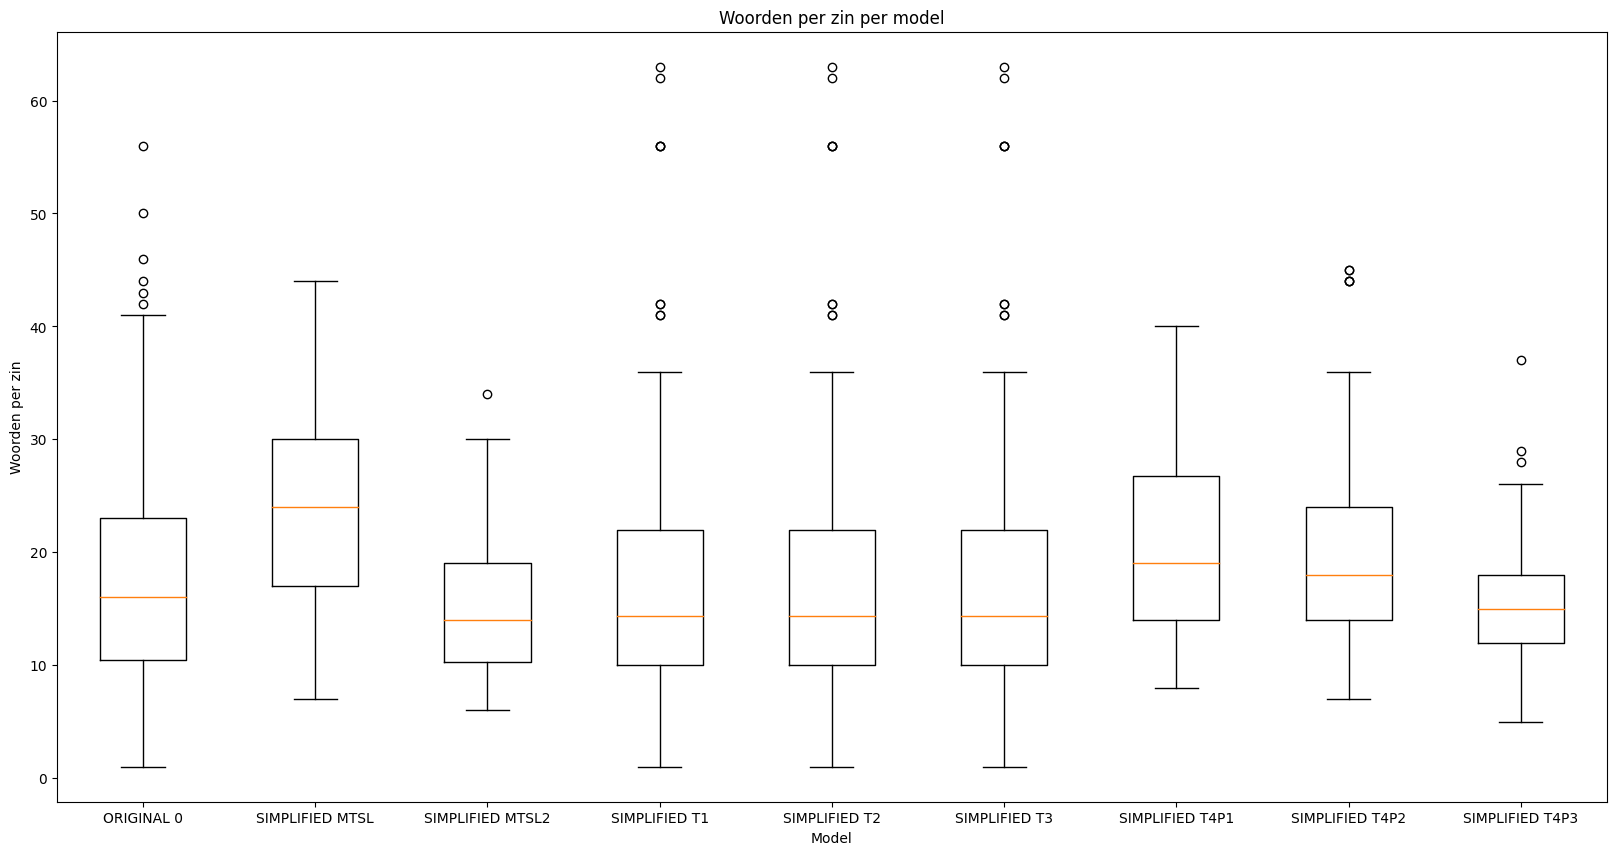

In [386]:
data = artikel_2.groupby('model')['words_per_sentence']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Woorden per zin')
plt.savefig('boxplot-avg-a2.png')

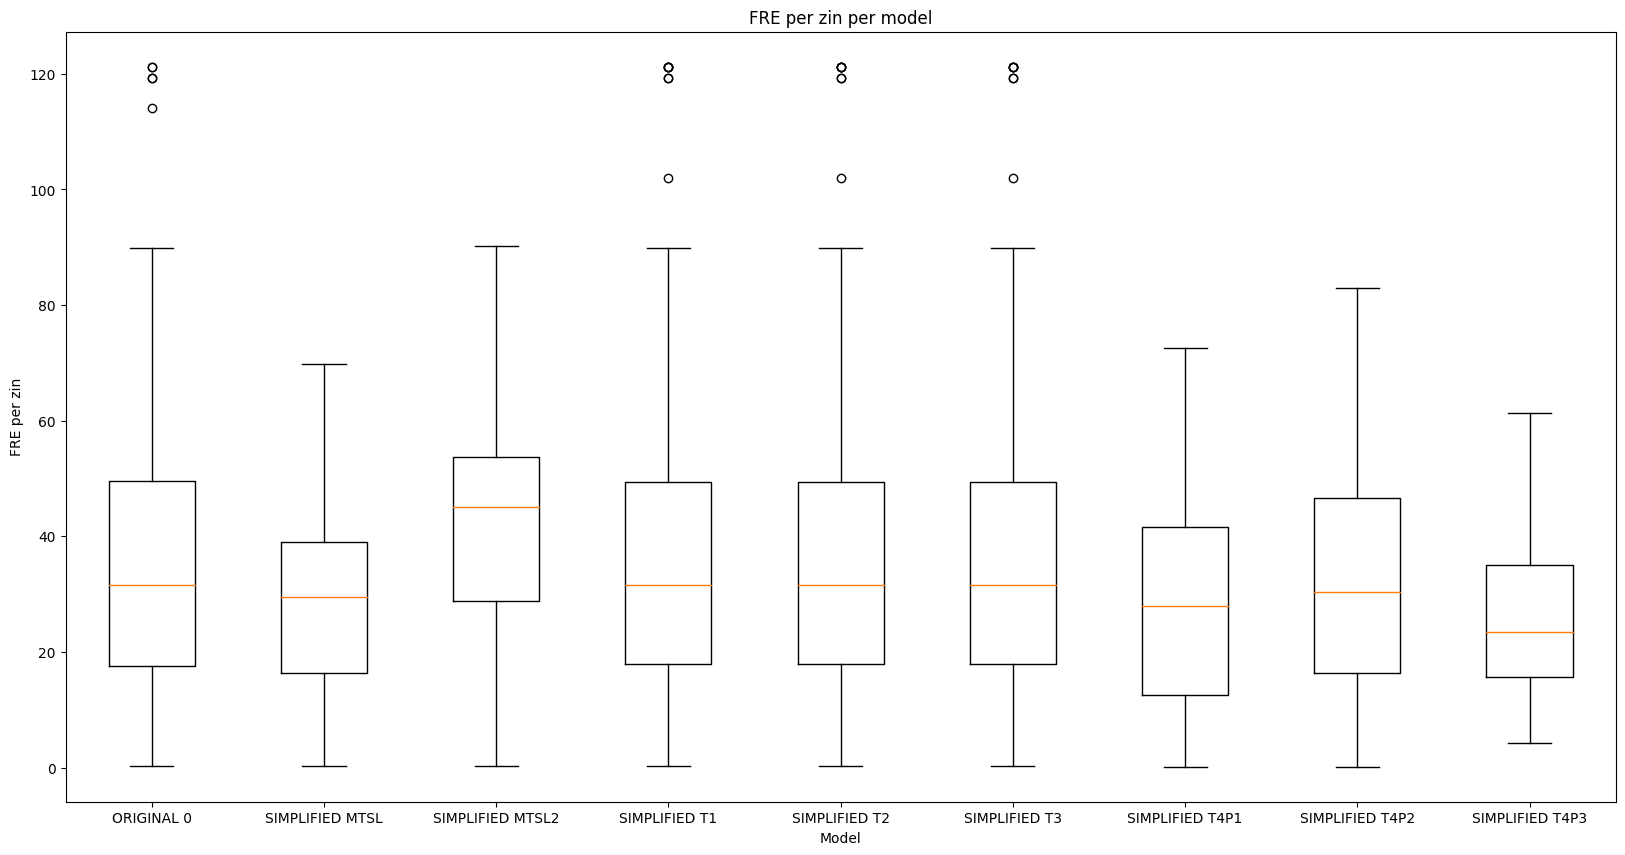

In [387]:
data = artikel_2.groupby('model')['FRE']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('FRE per zin per model')
plt.xlabel('Model')
plt.ylabel('FRE per zin')
plt.savefig('boxplot-fre-a2.png')

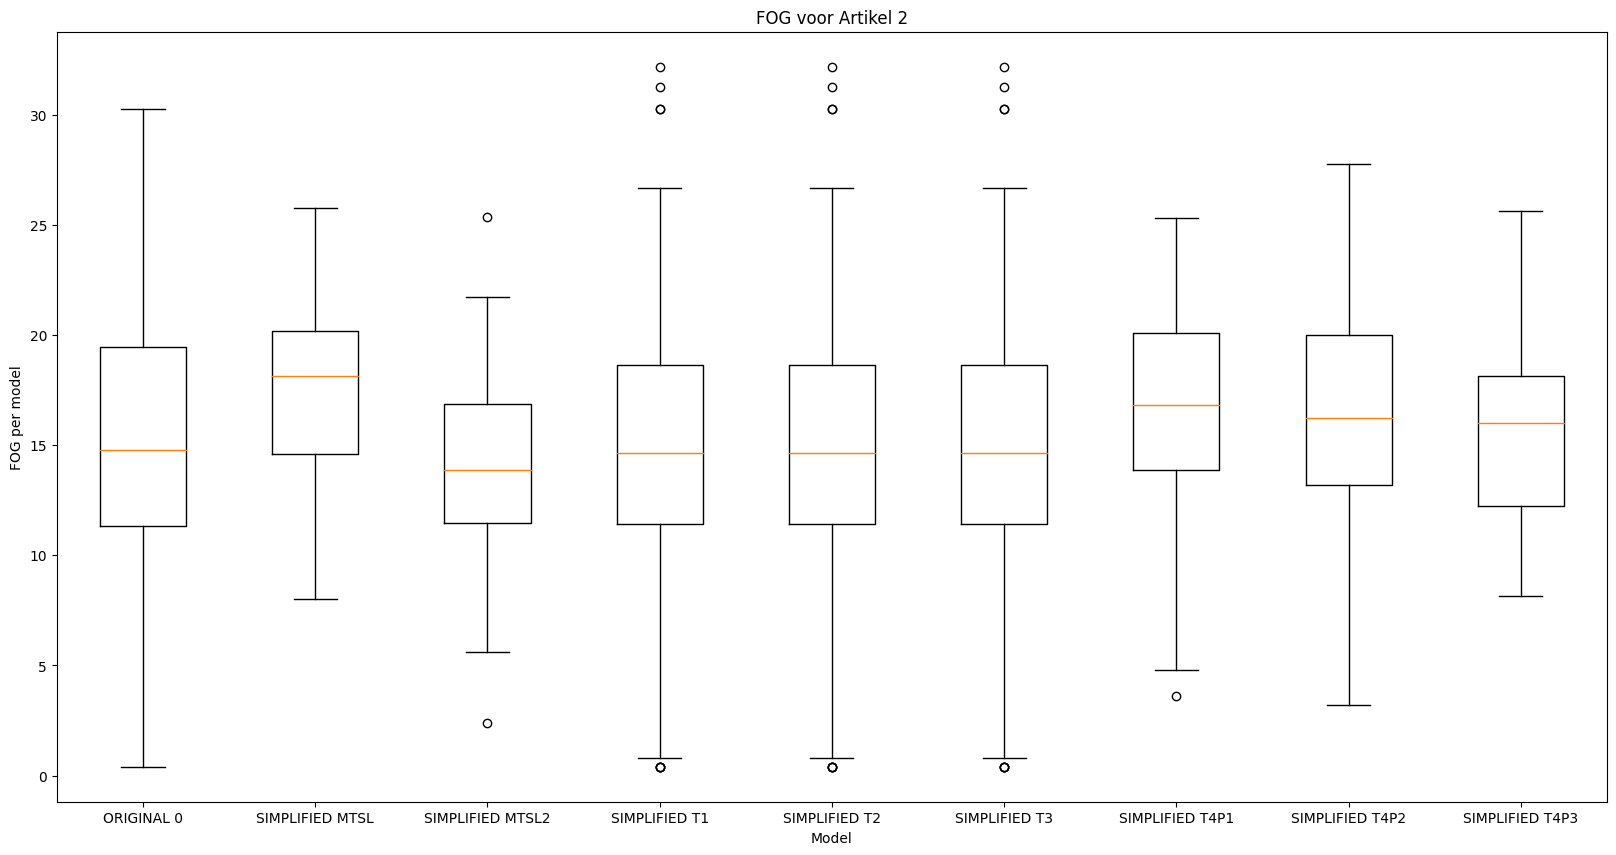

In [388]:
data = artikel_2.groupby('model')['FOG']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('FOG voor Artikel 2')
plt.xlabel('Model')
plt.ylabel('FOG per model')
plt.savefig('boxplot-fog-a2.png')

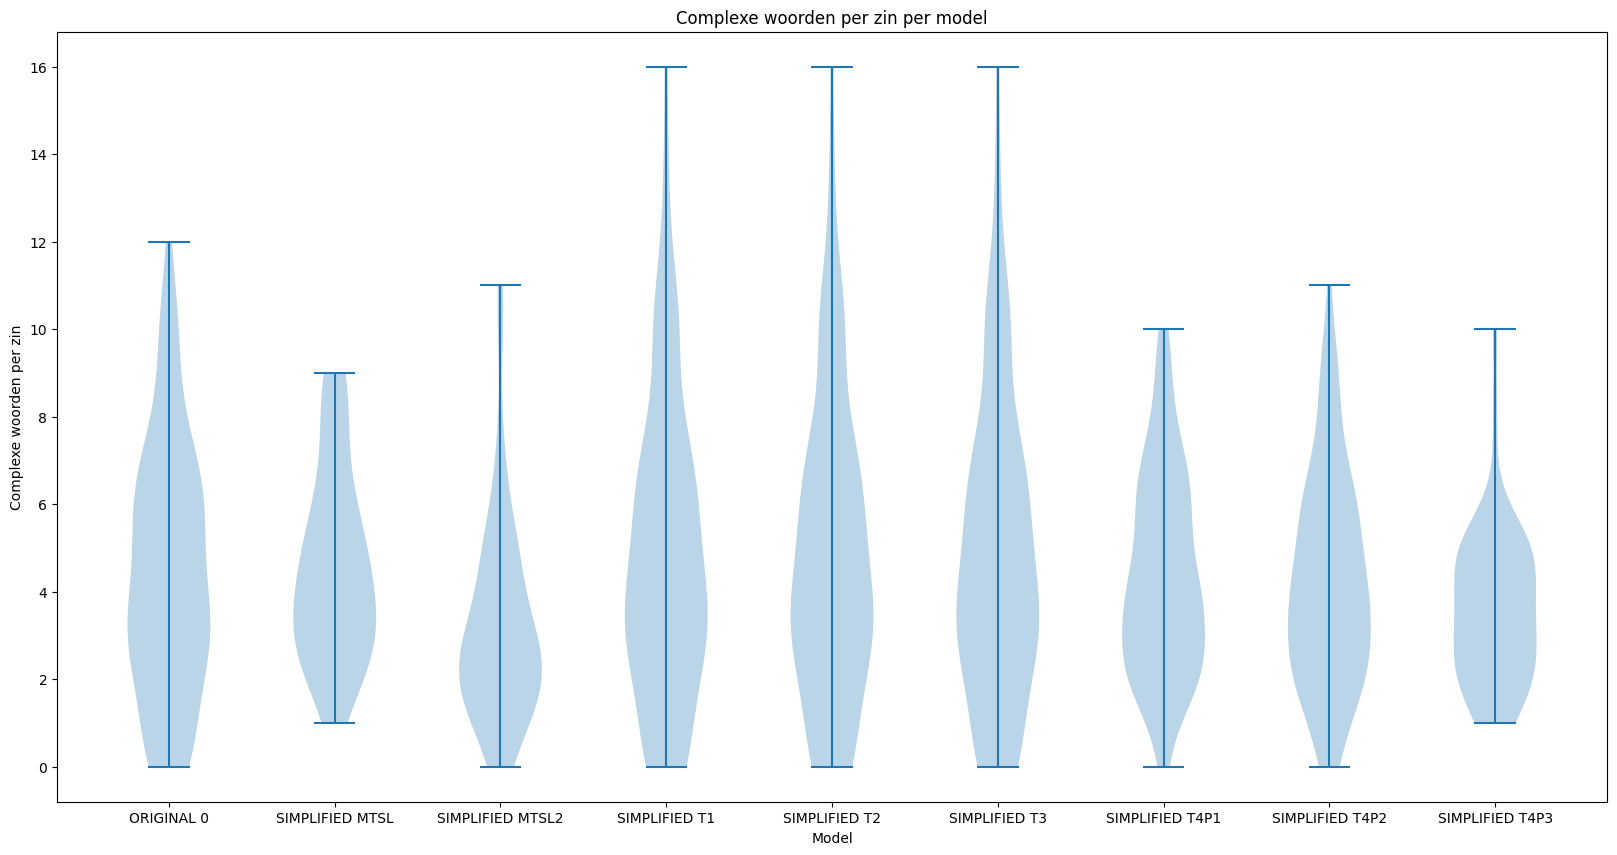

In [389]:
data = artikel_2.groupby('model')['complex_words']
data_list = [group[1].tolist() for group in data]

plt.figure(figsize=(20, 10))
plt.violinplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Complexe woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Complexe woorden per zin')
plt.savefig('violinplot-complex-a2.png')

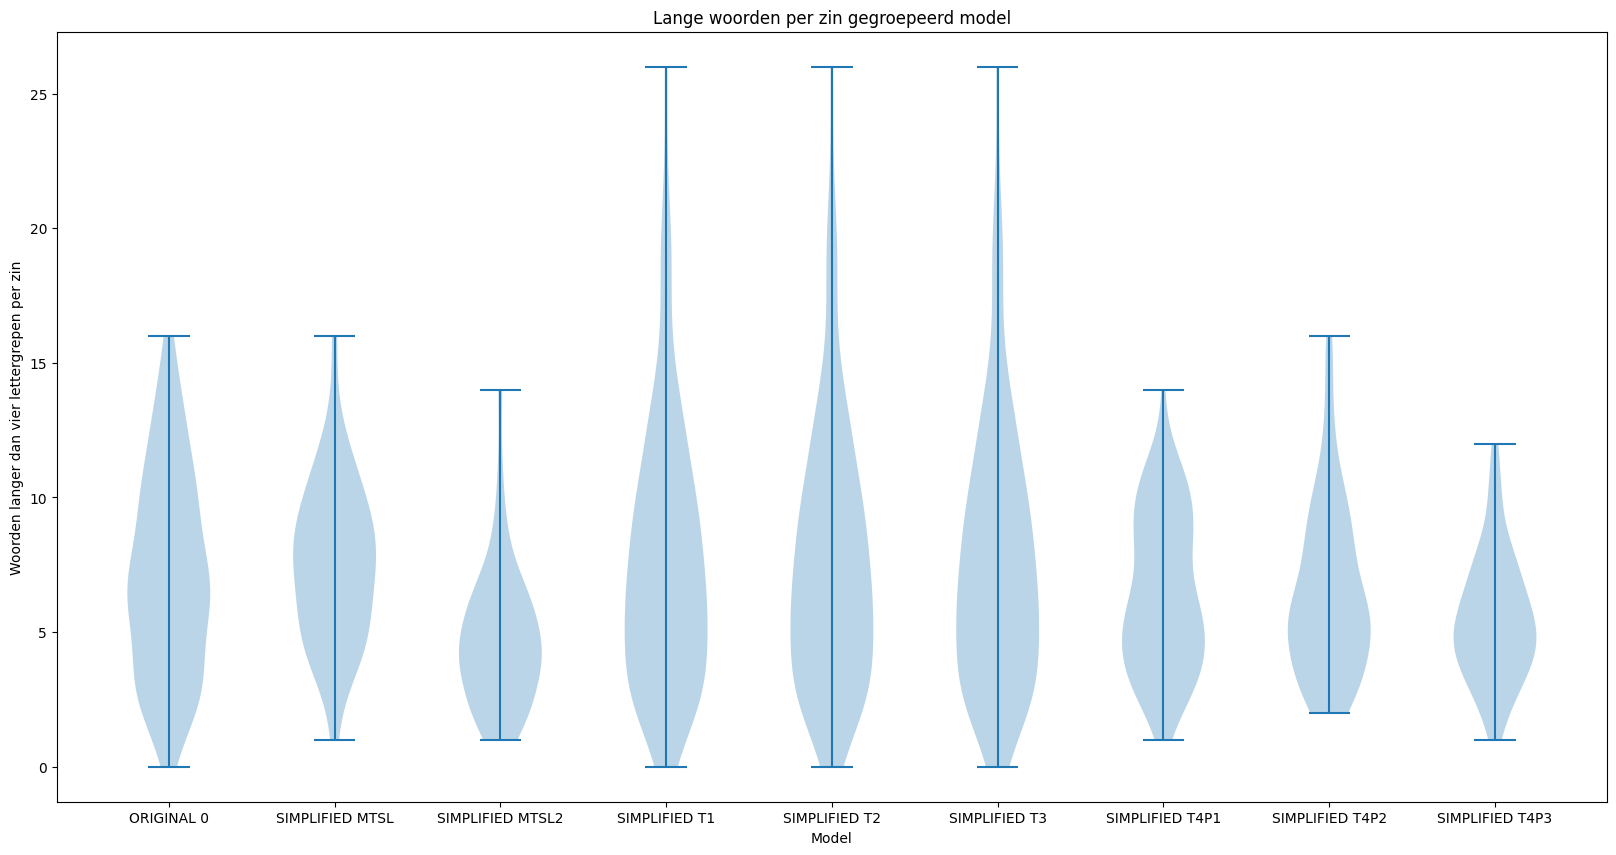

In [390]:
data = artikel_2.groupby('model')['long_words']
data_list = [group[1].tolist() for group in data]

plt.figure(figsize=(20, 10))
plt.violinplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Lange woorden per zin gegroepeerd model')
plt.xlabel('Model')
plt.ylabel('Woorden langer dan vier lettergrepen per zin')
plt.savefig('violinplot-long-a2.png')

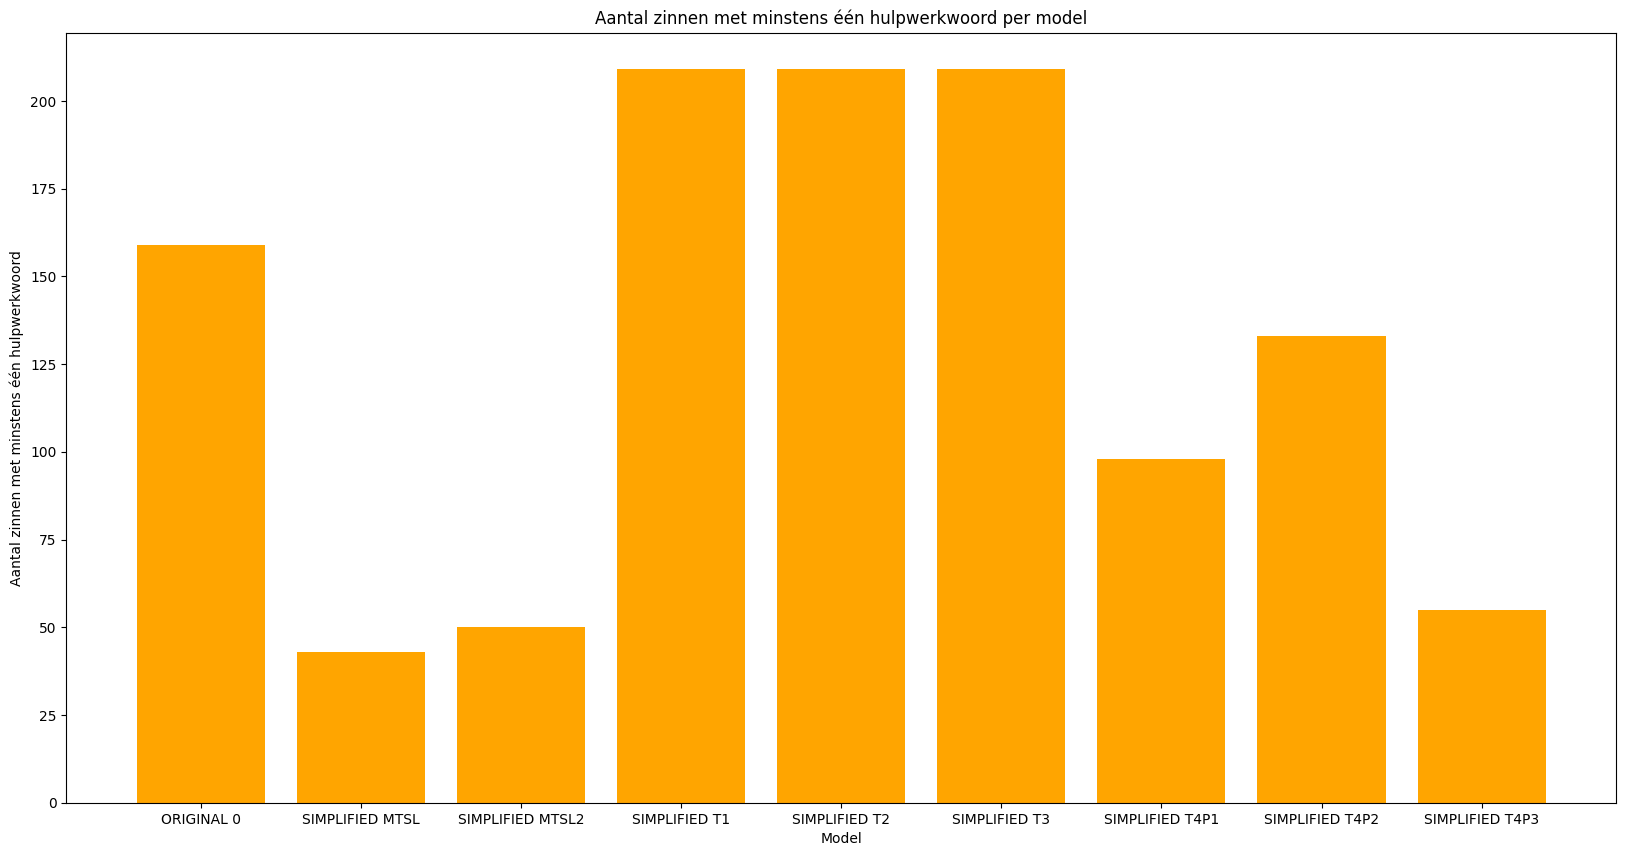

In [391]:
data = artikel_2.groupby('model')['auxverb'].count()
plt.figure(figsize=(20, 10))
color = 'orange'
plt.bar(data.index, data.values, color=color)
plt.xlabel('Model')
plt.ylabel('Aantal zinnen met minstens één hulpwerkwoord')
plt.title('Aantal zinnen met minstens één hulpwerkwoord per model')
plt.savefig('boxplot-aux-a2.png')

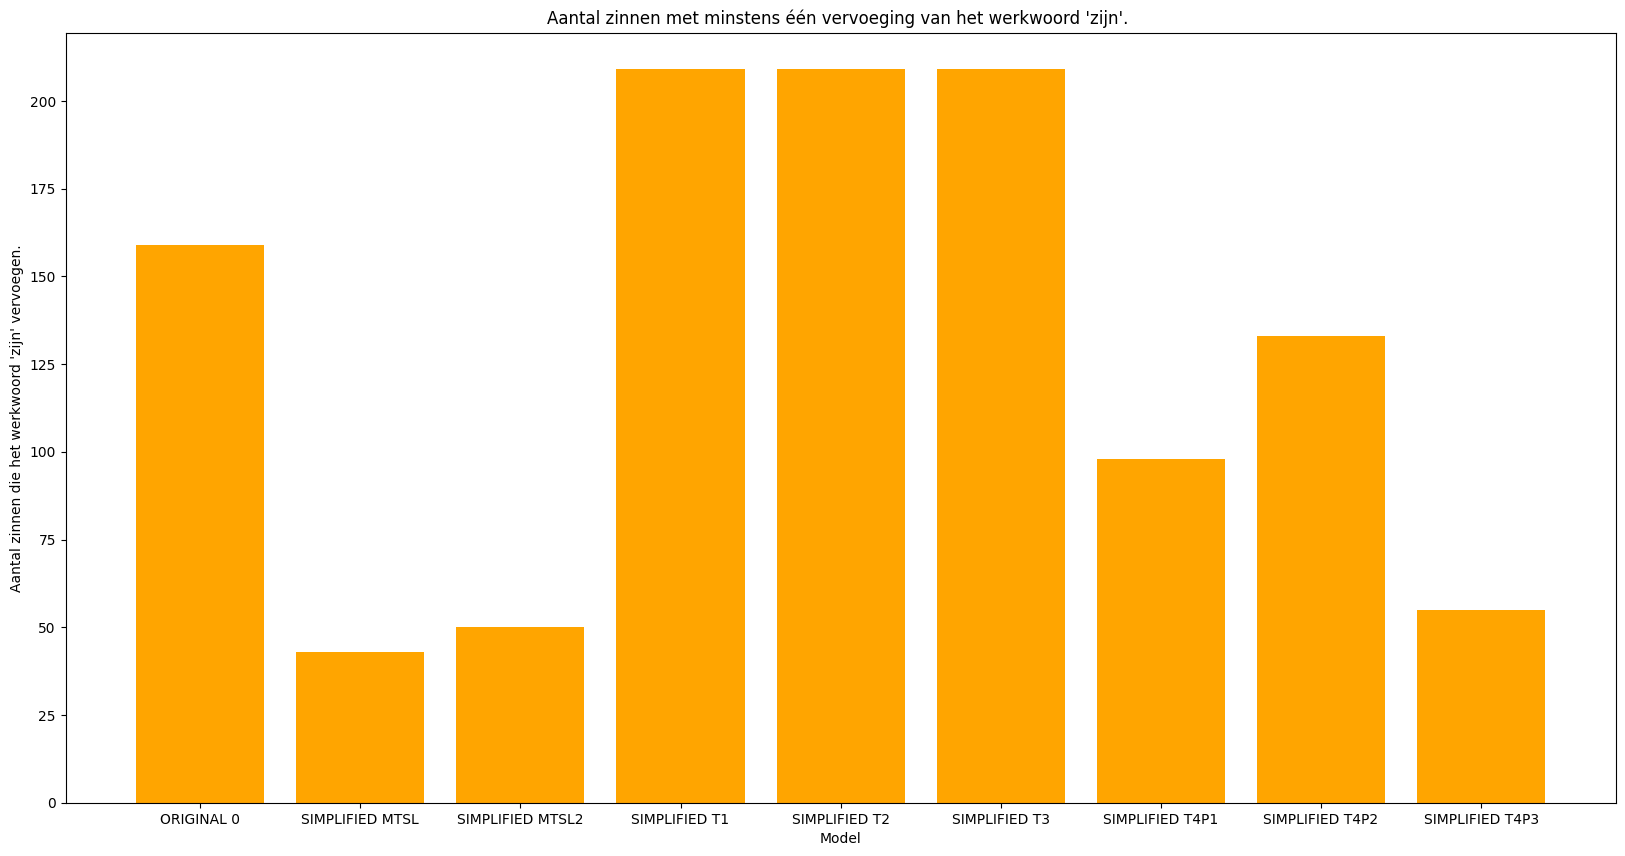

In [392]:
data = artikel_2.groupby('model')['tobeverb'].count()
plt.figure(figsize=(20, 10))
color = 'orange'
plt.bar(data.index, data.values, color=color)
plt.xlabel('Model')
plt.ylabel("Aantal zinnen die het werkwoord 'zijn' vervoegen.")
plt.title("Aantal zinnen met minstens één vervoeging van het werkwoord 'zijn'. ")
plt.savefig('boxplot-tobe-a2.png')